# Motor Insurance Case Study

The purpose of this notebook is to apply the CRISPDM steps of data understanding and data preparation, using 
the data from the Motor Insurance Case Study. We do this by preparing the **Data Quality Report** and the **Data Quality Plan** for the given data.

1. ## Data Understanding: Data Quality Report
The data quality report uses tables and visualisations to explore the data.
For each feature in the dataframe, we prepare summary tables (with descriptive stats) and plots.
Tables: One table for continuous features, one table for categorical features.
Plots: For continuous features, we prepare 
histograms and box plots. For categorical features, we prepare bar plots.

2. ## Data Understanding: Data Quality Plan
The data quality plan is a set of strategies to handle potential problems in the data.
We aim to find potential data quality problems and to prepare a table which lists for each feature, the problem found and potential solutions for fixing the problem.

## Data Quality Report: Tables


In [1]:
# From your virtul environment, install the pandas package for working with data frames: 
# conda install pandas
# pandas is an open source Python library for data analysis
# A data frame allows us to read and access data stored in spreadsheet (.csv) format
# Good tutorial on pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
# Pandas Cookbook: http://pandas.pydata.org/pandas-docs/stable/tutorials.html
# Another good resource for pandas: http://chrisalbon.com/python/pandas_dataframe_importing_csv.htm

#Import the required packages
#Import package pandas for data analysis
import pandas as pd

# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the comman below
%matplotlib inline

In [3]:
# Reading from a csv file, into a data frame
df = pd.read_csv('MotorInsuranceFraudClaimABTFull.csv')
# Show data frame
df

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.000000,0,1
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.000000,15028,0
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.0,0.000000,572,0
3,4,CI,0,NaN,3,Serious,Yes,270200,0,0,0.0,0.000000,270200,0
4,5,CI,0,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.000000,0,1
5,6,CI,0,NaN,1,Broken Limb,Yes,17480,0,0,0.0,0.000000,17480,0
6,7,CI,52567,Single,3,Broken Limb,No,3017,18102,2,1.0,0.500000,0,1
7,8,CI,0,NaN,2,Back,Yes,7463,0,0,0.0,0.000000,7463,0
8,9,CI,0,NaN,1,Soft Tissue,No,2067,0,0,NaN,0.000000,2067,0
9,10,CI,42300,Married,4,Back,No,2260,0,0,0.0,0.000000,2260,0


In [4]:
# Check how many rows and columns this dataframe has
df.shape

(500, 14)

In [5]:
#How many rows?
df.shape[0]

500

In [6]:
#How many columns?
df.shape[1]

14

In [7]:
# Show first 10 rows of data frame
# The rows are indexed starting from 0
df.head(10)

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0
3,4,CI,0,NaN,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
4,5,CI,0,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1
5,6,CI,0,NaN,1,Broken Limb,Yes,17480,0,0,0.0,0.0,17480,0
6,7,CI,52567,Single,3,Broken Limb,No,3017,18102,2,1.0,0.5,0,1
7,8,CI,0,NaN,2,Back,Yes,7463,0,0,0.0,0.0,7463,0
8,9,CI,0,NaN,1,Soft Tissue,No,2067,0,0,NaN,0.0,2067,0
9,10,CI,42300,Married,4,Back,No,2260,0,0,0.0,0.0,2260,0


In [7]:
# Show the data types in each column.
# int64 and float64 are numeric columns.
# The pandas type 'object' stands for Python strings
# Columns mixing numbers and characters are automatically converted to type 'object'.
# Some of the type 'object' columns may be more appropriate as numeric/continuous or as categorical types.
# We first explore the data, then decide which columns should be treated as 'continuous' and which 
# should be treated as 'categorical'.
df.dtypes

ID                           int64
Insurance Type              object
Income of Policy Holder      int64
Marital Status              object
Num Claimants                int64
Injury Type                 object
Overnight Hospital Stay     object
Claim Amount                 int64
Total Claimed                int64
Num Claims                   int64
Num Soft Tissue            float64
% Soft Tissue              float64
Claim Amount Received        int64
Fraud Flag                   int64
dtype: object

In [26]:
# Descriptive stats for continuous features
# df.describe() by default only prints stats for the numeric columns int64 and float64.
df.describe()

,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received
count,500.000000,500.000000,500.00000,500.00000,500.000000,490.000000,500.000000,500.000000
mean,13739.994000,1.908000,16373.20400,9597.18600,0.798000,0.234694,0.172012,13051.942000
std,20081.535489,1.012713,29426.27696,35655.68622,2.666724,0.589635,0.428015,30547.194864
min,0.000000,1.000000,-99999.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3322.25000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,5663.00000,0.00000,0.000000,0.000000,0.000000,3253.500000
75%,33918.500000,3.000000,12245.50000,11282.75000,1.000000,0.000000,0.000000,8191.750000
max,71284.000000,4.000000,270200.00000,729792.00000,56.000000,5.000000,2.000000,295303.000000


In [54]:
# Descriptive stats for continuous features
# Transpose the table so it looks like the table in the lecture/book
# One feature per row, stats in the columns
# The 'count' column shows how many rows have data for that feature.
# We can see that Num Soft Tissue only has 490 rows defined (out of 500 rows total), so 10 rows are 
# missing this value.
# This Table does not show the cardinality and the %Missing columns.
# We compute them below.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income of Policy Holder,500.0,13739.994000,20081.535489,0.0,0.00,0.0,33918.50,71284.0
Num Claimants,500.0,1.908000,1.012713,1.0,1.00,2.0,3.00,4.0
Claim Amount,500.0,16373.204000,29426.276960,-99999.0,3322.25,5663.0,12245.50,270200.0
Total Claimed,500.0,9597.186000,35655.686220,0.0,0.00,0.0,11282.75,729792.0
Num Claims,500.0,0.798000,2.666724,0.0,0.00,0.0,1.00,56.0
Num Soft Tissue,490.0,0.234694,0.589635,0.0,0.00,0.0,0.00,5.0
% Soft Tissue,500.0,0.172012,0.428015,0.0,0.00,0.0,0.00,2.0
Claim Amount Received,500.0,13051.942000,30547.194864,0.0,0.00,3253.5,8191.75,295303.0


In [55]:
#Keep only the numerical features.
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['Income of Policy Holder', 'Num Claimants', 'Claim Amount',
       'Total Claimed', 'Num Claims', 'Num Soft Tissue', '% Soft Tissue',
       'Claim Amount Received'],
      dtype='object')

In [56]:
# Select only the numeric features
df[numeric_columns]

,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received
0,0,2,1625,3250,2,2.0,1.000000,0
1,0,2,15028,60112,1,0.0,0.000000,15028
2,54613,1,-99999,0,0,0.0,0.000000,572
3,0,3,270200,0,0,0.0,0.000000,270200
4,0,4,8869,0,0,0.0,0.000000,0
5,0,1,17480,0,0,0.0,0.000000,17480
6,52567,3,3017,18102,2,1.0,0.500000,0
7,0,2,7463,0,0,0.0,0.000000,7463
8,0,1,2067,0,0,NaN,0.000000,2067
9,42300,4,2260,0,0,0.0,0.000000,2260


In [57]:
# Return the set of unique values for feature ID
df['ID'].unique()

[1, 2, 3, 4, 5, ..., 496, 497, 498, 499, 500]
Length: 500
Categories (500, int64): [1, 2, 3, 4, ..., 497, 498, 499, 500]

In [58]:
# Return the cardinality of the set of unique values, i.e., number of distinct values for feature ID
len(df['ID'].unique())

500

In [59]:
print("Feature, UniqueValues") 
for column in numeric_columns:
    print(column + "," + str(len(df[column].unique())))

Feature, UniqueValues
Income of Policy Holder,171
Num Claimants,4
Claim Amount,493
Total Claimed,235
Num Claims,7
Num Soft Tissue,6
% Soft Tissue,9
Claim Amount Received,329


In [60]:
# Return the unique values for feature Income
df['Income of Policy Holder'].unique()

array([    0, 54613, 52567, 42300, 50654, 37435, 38179, 42239, 37001,
       48898, 35139, 42575, 45351, 57509, 30294, 35469, 32366, 51016,
       49844, 42780, 23850, 53109, 52319, 26422, 40461, 42380, 21796,
       29510, 43015, 40913, 46636, 46891, 46308, 38813, 37478, 51974,
       28040, 36260, 58424, 67936, 51479, 48510, 44548, 41849, 27371,
       33548, 31490, 40449, 38295, 40826, 43071, 45780, 65163, 18842,
       36044, 27888, 43090, 30062, 43555, 47420, 34363, 39926, 59495,
       27903, 24998, 38772, 50922, 58472, 19866, 25124, 30248, 51522,
       31854, 56266, 57462, 42236, 43005, 51233, 38384, 36785, 36652,
       33785, 48005, 46377, 31829, 44205, 32000, 52000, 71284, 35810,
       32932, 28034, 49937, 34319, 51826, 22799, 36557, 68152, 46365,
       53440, 33567, 43455, 46264, 38082, 44603, 30438, 42147, 39940,
       43164, 35994, 54897, 43003, 26115, 29508, 43270, 36370, 39623,
       26336, 35637, 47180, 19192, 16730, 29419, 42935, 40340, 43267,
       30675, 39912,

In [61]:
#Missing data
#http://pandas.pydata.org/pandas-docs/stable/missing_data.html
# When summing data, NA (missing) values will be treated as zero
# If the data are all NA, the result will be NA
# Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays

#Missing data all features
df.isnull().sum()

ID                           0
Insurance Type               0
Income of Policy Holder      0
Marital Status             330
Num Claimants                0
Injury Type                  0
Overnight Hospital Stay      0
Claim Amount                 0
Total Claimed                0
Num Claims                   0
Num Soft Tissue             10
% Soft Tissue                0
Claim Amount Received        0
Fraud Flag                   0
dtype: int64

In [62]:
# Missing values for numeric columns only.
# As we knew already 'Num Soft Tissue' has 10 values missing.
df[numeric_columns].isnull().sum()

Income of Policy Holder     0
Num Claimants               0
Claim Amount                0
Total Claimed               0
Num Claims                  0
Num Soft Tissue            10
% Soft Tissue               0
Claim Amount Received       0
dtype: int64

In [63]:
# Turn the feature 'ID' from 'int64' to 'category' type
df['ID'] = df['ID'].astype('category')
df.dtypes

ID                         category
Insurance Type             category
Income of Policy Holder       int64
Marital Status             category
Num Claimants                 int64
Injury Type                category
Overnight Hospital Stay    category
Claim Amount                  int64
Total Claimed                 int64
Num Claims                    int64
Num Soft Tissue             float64
% Soft Tissue               float64
Claim Amount Received         int64
Fraud Flag                 category
dtype: object

In [64]:
# Turn the feature FraudFlag into type 'category'
df['Fraud Flag'] = df['Fraud Flag'].astype('category')
df.dtypes

ID                         category
Insurance Type             category
Income of Policy Holder       int64
Marital Status             category
Num Claimants                 int64
Injury Type                category
Overnight Hospital Stay    category
Claim Amount                  int64
Total Claimed                 int64
Num Claims                    int64
Num Soft Tissue             float64
% Soft Tissue               float64
Claim Amount Received         int64
Fraud Flag                 category
dtype: object

In [65]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns
object_columns

Index([], dtype='object')

In [66]:
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes    

ID                         category
Insurance Type             category
Income of Policy Holder       int64
Marital Status             category
Num Claimants                 int64
Injury Type                category
Overnight Hospital Stay    category
Claim Amount                  int64
Total Claimed                 int64
Num Claims                    int64
Num Soft Tissue             float64
% Soft Tissue               float64
Claim Amount Received         int64
Fraud Flag                 category
dtype: object

In [67]:
#Look at the categorical features only
category_columns = df.select_dtypes(['category']).columns
df[category_columns]

,ID,Insurance Type,Marital Status,Injury Type,Overnight Hospital Stay,Fraud Flag
0,1,CI,NaN,Soft Tissue,No,1
1,2,CI,NaN,Back,Yes,0
2,3,CI,Married,Broken Limb,No,0
3,4,CI,NaN,Serious,Yes,0
4,5,CI,NaN,Soft Tissue,No,1
5,6,CI,NaN,Broken Limb,Yes,0
6,7,CI,Single,Broken Limb,No,1
7,8,CI,NaN,Back,Yes,0
8,9,CI,NaN,Soft Tissue,No,0
9,10,CI,Married,Back,No,0


In [68]:
# Descriptive stats for categorical features only.
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
ID,500,500,500,1
Insurance Type,500,1,CI,500
Marital Status,170,3,Married,99
Injury Type,500,4,Broken Limb,177
Overnight Hospital Stay,500,2,No,354
Fraud Flag,500,2,0,332


In [69]:
# Performing a descriptive statistic
# Shows the mean for each numeric feature
df.mean()

ID                           250.500000
Income of Policy Holder    13739.994000
Num Claimants                  1.908000
Claim Amount               16373.204000
Total Claimed               9597.186000
Num Claims                     0.798000
Num Soft Tissue                0.234694
% Soft Tissue                  0.172012
Claim Amount Received      13051.942000
Fraud Flag                     0.336000
dtype: float64

In [70]:
# Performing a descriptive statistic
# Shows the standard deviation for each numeric feature
df.std()

ID                           144.481833
Income of Policy Holder    20081.535489
Num Claimants                  1.012713
Claim Amount               29426.276960
Total Claimed              35655.686220
Num Claims                     2.666724
Num Soft Tissue                0.589635
% Soft Tissue                  0.428015
Claim Amount Received      30547.194864
Fraud Flag                     0.472812
dtype: float64

In [71]:
# Performing a descriptive statistic
# Shows the median
df.median()

ID                          250.5
Income of Policy Holder       0.0
Num Claimants                 2.0
Claim Amount               5663.0
Total Claimed                 0.0
Num Claims                    0.0
Num Soft Tissue               0.0
% Soft Tissue                 0.0
Claim Amount Received      3253.5
Fraud Flag                    0.0
dtype: float64

In [72]:
# Performing a descriptive statistic
# Shows the value for each feature
# For object/string features it orders values alphabetically
# For categorical features it shows the least frequent category
df.min()

ID                              1
Insurance Type                 CI
Income of Policy Holder         0
Num Claimants                   1
Injury Type                  Back
Overnight Hospital Stay        No
Claim Amount               -99999
Total Claimed                   0
Num Claims                      0
Num Soft Tissue                 0
% Soft Tissue                   0
Claim Amount Received           0
Fraud Flag                      0
dtype: object

In [73]:
# Performing a descriptive statistic
# Shows the standard deviation for each feature
df.max()

ID                                 500
Insurance Type                      CI
Income of Policy Holder          71284
Num Claimants                        4
Injury Type                Soft Tissue
Overnight Hospital Stay            Yes
Claim Amount                    270200
Total Claimed                   729792
Num Claims                          56
Num Soft Tissue                      5
% Soft Tissue                        2
Claim Amount Received           295303
Fraud Flag                           1
dtype: object

## Data Quality Report: Visualisations

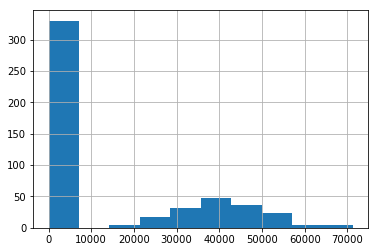

In [75]:
#Plot a histogram of the continuous feature Income
df['Income of Policy Holder'].hist()

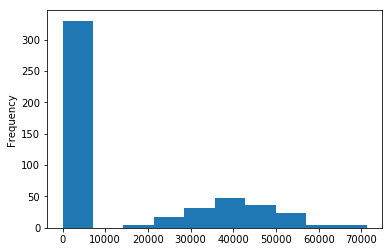

In [76]:
#Another way to plot a histogram
#plt.figure(figsize=(20,10))
df['Income of Policy Holder'].plot(kind='hist')

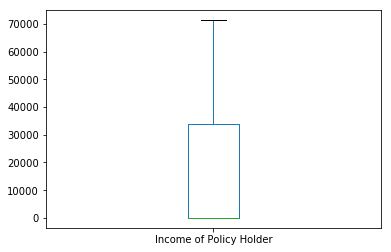

In [77]:
# Plot a boxplot for continuous feature Income
%matplotlib inline
#plt.figure(figsize=(20,10))
df['Income of Policy Holder'].plot(kind='box')

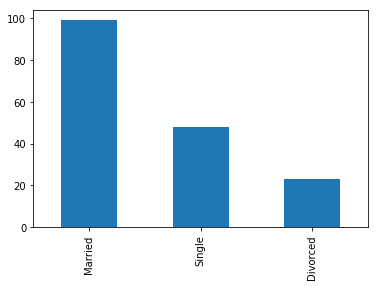

In [78]:
# Show a barplot for categorical feature 
df['Marital Status'].value_counts().plot(kind='bar')

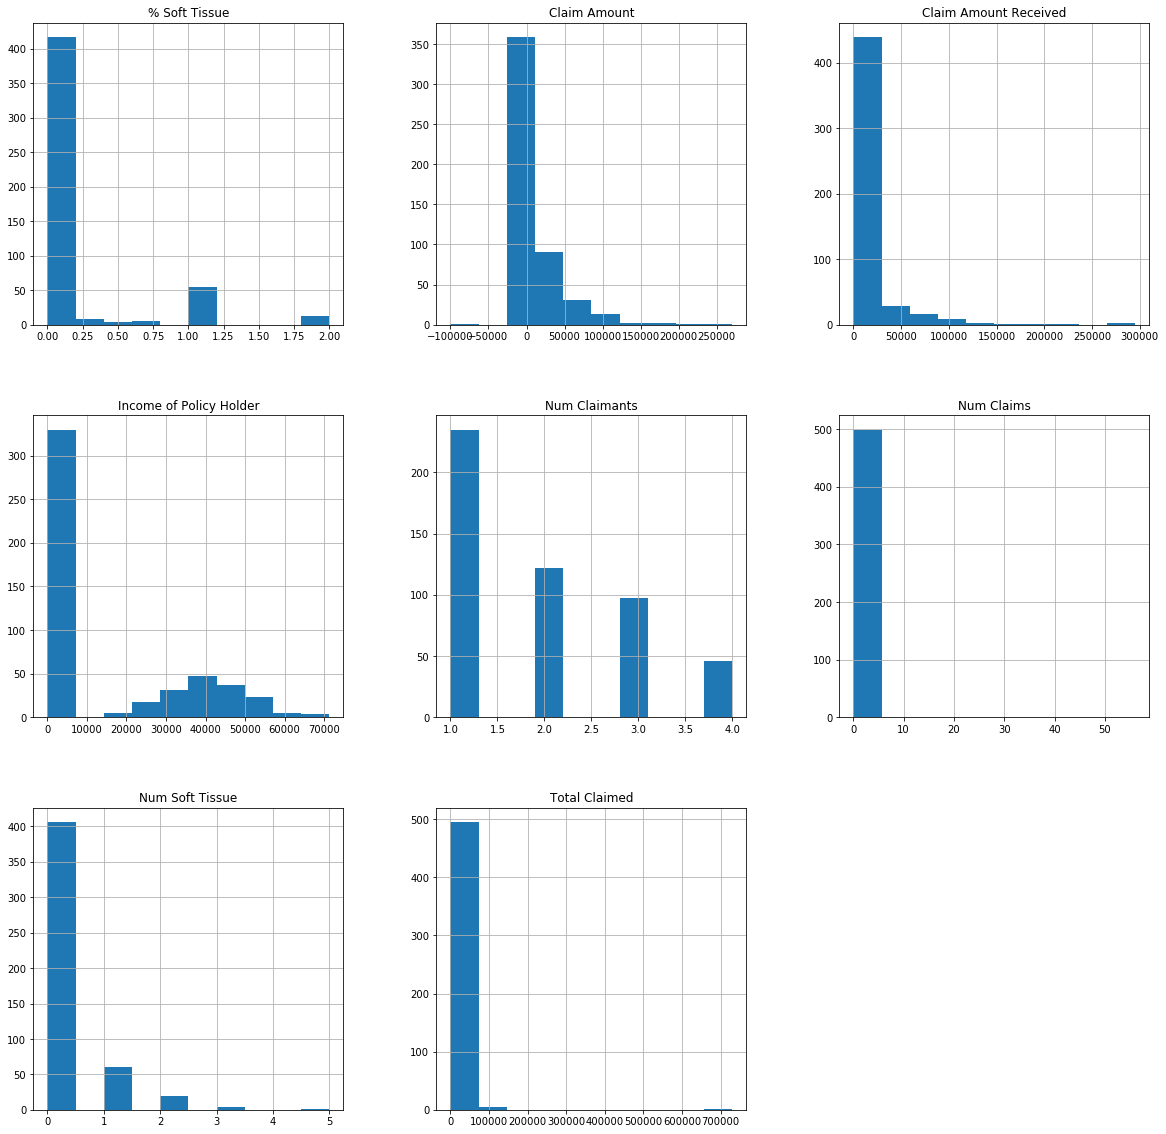

In [79]:
#http://pandas.pydata.org/pandas-docs/stable/visualization.html
# We can plot the histogram of all numeric features at the same time.
plt.figure()
df.hist(figsize=(20, 20))

# We can save the plot into a file s shown below.
plt.savefig('MotorInsurance-DataQualityReport-NumericFeatures-Histograms.png')

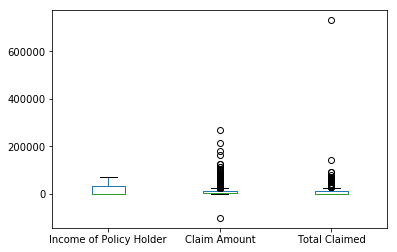

In [80]:
plt.figure(figsize=(20, 20))
#df['Income of Policy Holder'].plot(kind='box')
df[['Income of Policy Holder', 'Claim Amount', 'Total Claimed']].plot(kind='box')
#df.hist(figsize=(20, 20))
plt.savefig('MotorInsurance-DataQualityReport-NumericFeatures-Boxplots.png')

In [83]:
# Print data quality report for numeric features to a file
data_quality_report_numeric_table = df[numeric_columns].describe().T
data_quality_report_numeric_table.to_csv("MotorInsurance-DataQualityReport-NumericFeatures-Table.csv", 
                                         index_label='Feature')
data_quality_report_numeric_table

,count,mean,std,min,25%,50%,75%,max
Income of Policy Holder,500.0,13739.994000,20081.535489,0.0,0.00,0.0,33918.50,71284.0
Num Claimants,500.0,1.908000,1.012713,1.0,1.00,2.0,3.00,4.0
Claim Amount,500.0,16373.204000,29426.276960,-99999.0,3322.25,5663.0,12245.50,270200.0
Total Claimed,500.0,9597.186000,35655.686220,0.0,0.00,0.0,11282.75,729792.0
Num Claims,500.0,0.798000,2.666724,0.0,0.00,0.0,1.00,56.0
Num Soft Tissue,490.0,0.234694,0.589635,0.0,0.00,0.0,0.00,5.0
% Soft Tissue,500.0,0.172012,0.428015,0.0,0.00,0.0,0.00,2.0
Claim Amount Received,500.0,13051.942000,30547.194864,0.0,0.00,3253.5,8191.75,295303.0


In [84]:
# Print data quality report for categorical features to a file
data_quality_report_categorical_table = df[category_columns].describe().T
data_quality_report_categorical_table.to_csv("MotorInsurance-DataQualityReport-CategoricalFeatures-Table.csv", 
                                         index_label='Feature')
data_quality_report_categorical_table

,count,unique,top,freq
ID,500,500,500,1
Insurance Type,500,1,CI,500
Marital Status,170,3,Married,99
Injury Type,500,4,Broken Limb,177
Overnight Hospital Stay,500,2,No,354
Fraud Flag,500,2,0,332


## Data Understanding: Data Quality Plan
For example:

    
| Feature                 | Data Quality Issue   | Handling Strategy                     |
|-------------------------|----------------------|--------------------------------       |
| Marital Status          | Missing Values (60%) | Complete-case analysis (drop feature) |
|Insurance Type           |Cardinality=1        | Drop feature                           



## Exercises

1. **Data Understanding: Data Quality Plan.** Design a data quality plan for the Motor Insurance data. Below the table describe your thinking around the issues identified and the solutions proposed.
2. **Implementing Data Quality Strategies.** Update your csv file to include the actions noted in your data quality plan (e.g., dropped features, dropped examples, outliers, filling missing data).
3. **Clean Data.** Save the new data frame to a file with a name that reflects that the data has been cleaned (e.g., motor_isurance_clean_round1_8Feb2018.csv).
4. **Data Understanding: Relationships between feature pairs.** Explor relationships between feature pairs by using appropriate plots.

In [3]:
df.head(20)

NameError: name 'df' is not defined